## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [10]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets

np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [11]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [12]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [13]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [14]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [15]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

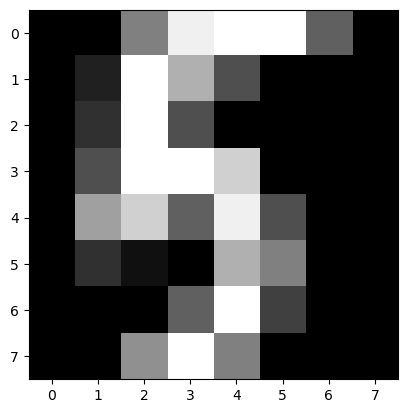

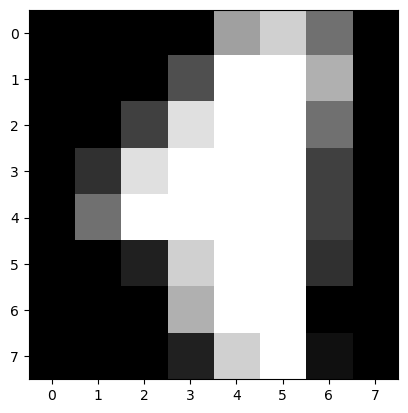

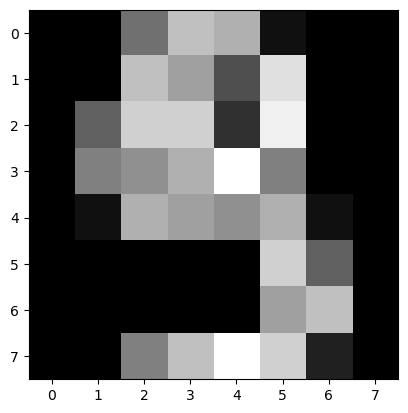

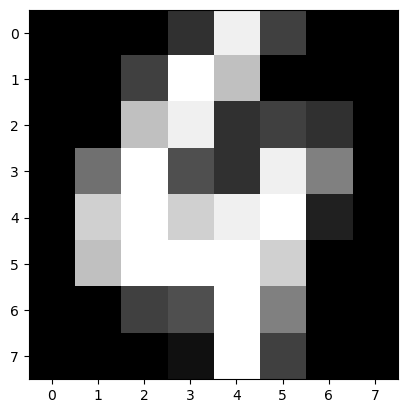

In [17]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

# MLPClassifier

In [19]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)


Iteration 1, loss = 6.96166799
Validation score: 0.173611
Iteration 2, loss = 3.38682960
Validation score: 0.250000
Iteration 3, loss = 2.30535931
Validation score: 0.284722
Iteration 4, loss = 1.73830960
Validation score: 0.430556
Iteration 5, loss = 1.40844348
Validation score: 0.569444
Iteration 6, loss = 1.17545814
Validation score: 0.708333
Iteration 7, loss = 0.98965136
Validation score: 0.763889
Iteration 8, loss = 0.82947809
Validation score: 0.750000
Iteration 9, loss = 0.69353071
Validation score: 0.798611
Iteration 10, loss = 0.58298952
Validation score: 0.805556
Iteration 11, loss = 0.49723029
Validation score: 0.805556
Iteration 12, loss = 0.42474694
Validation score: 0.826389
Iteration 13, loss = 0.36798193
Validation score: 0.840278
Iteration 14, loss = 0.32322252
Validation score: 0.875000
Iteration 15, loss = 0.28564721
Validation score: 0.875000
Iteration 16, loss = 0.25239497
Validation score: 0.888889
Iteration 17, loss = 0.22596617
Validation score: 0.895833
Iterat

In [20]:
model1.loss_curve_

[6.961667990865341,
 3.386829602379183,
 2.3053593127006593,
 1.7383095952821688,
 1.408443476079006,
 1.175458140403809,
 0.9896513593485389,
 0.8294780873440039,
 0.6935307065211131,
 0.5829895169406843,
 0.4972302873163056,
 0.42474694221712567,
 0.36798192626363646,
 0.32322251869897534,
 0.28564721046055414,
 0.25239496679570544,
 0.22596616547460668,
 0.20306055295942574,
 0.18170155756125533,
 0.16434641021169413,
 0.1462406644241717,
 0.13161516821288938,
 0.11906010305822921,
 0.10857149370578444,
 0.09847435255683344,
 0.09000639005187583,
 0.0814164166536714,
 0.0747721215039647,
 0.06785189030290671,
 0.0636907263562475,
 0.05718873895628749]

In [21]:
%%time
y_pred = model1.predict(X_test)

Wall time: 3.29 ms


In [22]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9535    0.9762        43
           1     0.9706    0.9429    0.9565        35
           2     0.9722    0.9722    0.9722        36
           3     0.9750    0.9512    0.9630        41
           4     0.9250    0.9737    0.9487        38
           5     0.9286    0.8667    0.8966        30
           6     1.0000    1.0000    1.0000        37
           7     0.9714    0.9189    0.9444        37
           8     0.8182    0.9310    0.8710        29
           9     0.8611    0.9118    0.8857        34

    accuracy                         0.9444       360
   macro avg     0.9422    0.9422    0.9414       360
weighted avg     0.9469    0.9444    0.9450       360



In [23]:
y_pred = model1.predict(X_test)
y_pred

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 9, 5, 2, 1, 7, 0, 5, 8,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 1, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       8, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 9, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 8, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 9, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 8, 5, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 4, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 7, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 8, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

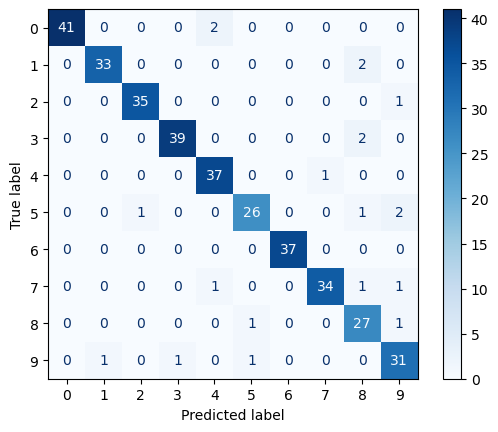

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## With RandomizedSearchCV

In [35]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='accuracy', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
Wall time: 1min 25s


In [36]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'tol': 5e-05, 'solver': 'sgd', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (64, 128), 'early_stopping': True, 'batch_size': 25, 'alpha': 0, 'activation': 'relu'}


In [45]:
X_test.shape

(360, 64)

In [37]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9535    0.9762        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    1.0000    1.0000        41
           4     0.9500    1.0000    0.9744        38
           5     0.9375    1.0000    0.9677        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9459    0.9722        37
           8     0.9643    0.9310    0.9474        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9806       360
   macro avg     0.9795    0.9801    0.9794       360
weighted avg     0.9812    0.9806    0.9806       360

Wall time: 7.12 ms


In [46]:
y_pred.shape

(360,)

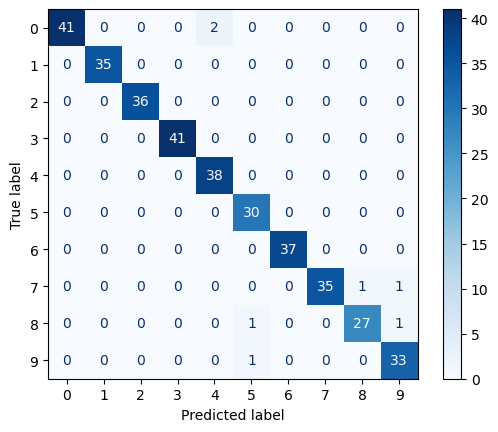

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## MLP-GRID

In [51]:
%%time

param_grid = {
    'hidden_layer_sizes': [ (64,)],
    'activation': [ 'relu'],
    'solver': ['adam'],
    'alpha': [ .005],
    'batch_size': [25],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.0005],
    'max_iter': [500],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

grid_search = GridSearchCV(
    estimator = MLPClassifier(),
    param_grid = param_grid,
    cv=3, 
    scoring='accuracy', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Wall time: 5.8 s


In [53]:
model3 = grid_search.best_estimator_


In [54]:
%%time
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9756    0.9302    0.9524        43
           1     0.9167    0.9429    0.9296        35
           2     1.0000    1.0000    1.0000        36
           3     0.9756    0.9756    0.9756        41
           4     0.9000    0.9474    0.9231        38
           5     0.8387    0.8667    0.8525        30
           6     1.0000    1.0000    1.0000        37
           7     0.9444    0.9189    0.9315        37
           8     1.0000    0.8966    0.9455        29
           9     0.8889    0.9412    0.9143        34

    accuracy                         0.9444       360
   macro avg     0.9440    0.9419    0.9424       360
weighted avg     0.9460    0.9444    0.9447       360

Wall time: 6.28 ms


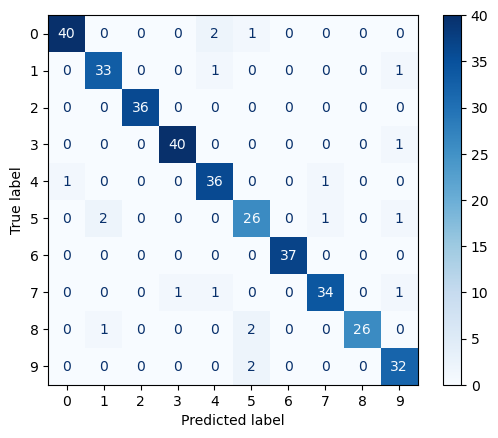

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()